# **CSCI 4402	FINAL YEAR PROJECT II**


> ## **Detection of Cone Cut Errors in Dental Bitewing Radiograph using CNN for Quality Assurance**

### Prepared by:
  **MOHAMED MOUBARAK MOHAMED MISBAHOU MKOUBOI (1820705)**

# Labelling the images inside the folders

In [378]:
# Labelling the images in the folder named "normal" 

import os

path = os.chdir("D:\\courses\\4th year\\Sem 1, 2022-2023\\CSCI 4402 FINAL YEAR PROJECT II\\code\\fyp dataset\\normal")

counter = 1
for file in os.listdir(path):
  new_file_name = "normal " "{}.jpg".format(counter)
  os.rename(file, new_file_name)

  counter += 1

In [380]:
# Labelling the images in the folder named "cone cut" 

import os

path = os.chdir("D:\\courses\\4th year\\Sem 1, 2022-2023\\CSCI 4402 FINAL YEAR PROJECT II\\code\\fyp dataset\\cone cut")

counter = 1
for file in os.listdir(path):
  new_file_name = "cone cut " "{}.jpg".format(counter)
  os.rename(file, new_file_name)

  counter += 1

# Data Augmentation

In [374]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
# from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=False,
        fill_mode='nearest')

img = load_img('D:\\courses\\4th year\\Sem 1, 2022-2023\\CSCI 4402 FINAL YEAR PROJECT II\\code\\fyp dataset\\cone cut\\cone cut 13.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='D:\\courses\\4th year\\Sem 1, 2022-2023\\CSCI 4402 FINAL YEAR PROJECT II\\code\\fyp dataset\\augmentaiton', save_prefix='a', save_format='jpg'):
    i += 1
    if i >= 37:
        break  # otherwise the generator would loop indefinitely

# Splitting the dateset into test and train folders 

In [381]:
# Install the Split - folder package

%pip install split-folders

Note: you may need to restart the kernel to use updated packages.


In [382]:
# Import the package

import splitfolders

splitfolders.ratio("D:\\courses\\4th year\\Sem 1, 2022-2023\\CSCI 4402 FINAL YEAR PROJECT II\\code\\fyp dataset", # The location of dataset
                   output="D:\\courses\\4th year\\Sem 1, 2022-2023\\CSCI 4402 FINAL YEAR PROJECT II", # The output location
                   seed=42, # The number of seed
                   ratio=(.7, .2, .1), # ration of split is 70%, 20%, 10%
                   group_prefix=None, # If your dataset contains more than one file like ".jpg", ".pdf", etc
                   move=False # I choose not to move, so I turn this into False
                   )

# Build our Image Classification Model!

## Import the required libraries 

In [383]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras

from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import cv2
import os

import numpy as np
import pandas as pd
from keras.models import Sequential

## Loading the data

In [384]:
#cone_cut = 0, normal = 1

labels = ['cone cut', 'normal']
img_size = 224
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [385]:
labels = ['cone cut', 'normal']
print(labels.index("cone cut"), 'cone cut')
print(labels.index("normal"), 'normal')

0 cone cut
1 normal


In [386]:
# Now we can easily fetch our train and validation data.

train = get_data('D:\\courses\\4th year\\Sem 1, 2022-2023\\CSCI 4402 FINAL YEAR PROJECT II\\data\\train')
val = get_data('D:\\courses\\4th year\\Sem 1, 2022-2023\\CSCI 4402 FINAL YEAR PROJECT II\\data\\val')
test = get_data('D:\\courses\\4th year\\Sem 1, 2022-2023\\CSCI 4402 FINAL YEAR PROJECT II\\data\\test')    

C:\Users\User\AppData\Local\Temp\ipykernel_9672\406513326.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


In [387]:
# Print classes inside the dataset

print(os.listdir("D:\\courses\\4th year\\Sem 1, 2022-2023\\CSCI 4402 FINAL YEAR PROJECT II\\data"))

['test', 'train', 'val']


In [388]:
train.shape

(7018, 2)

In [389]:
val.shape

(2004, 2)

In [390]:
test.shape

(1006, 2)

In [ ]:
# train[0][0] == is the image in numaric format
# train[0][1] == is the label of the image (0==cone_cut, 1 == normal)

## Visualize the data

In [391]:
# plotting the distribution of the dataset

l = []
for i in train:
    if(i[1] == 0):
        l.append("cone cut")
    else:
        l.append("normal")
sns.set_style('darkgrid')
# sns.countplot(l)

In [392]:
# data type of the variable l

type(l)

list

In [393]:
# putting l in a dataframe

df = pd.DataFrame(l)

In [394]:
# Showing the first 5 rows of the dataframe

df.head()

,0
0,cone cut
1,cone cut
2,cone cut
3,cone cut
4,cone cut


<AxesSubplot: xlabel='0'>

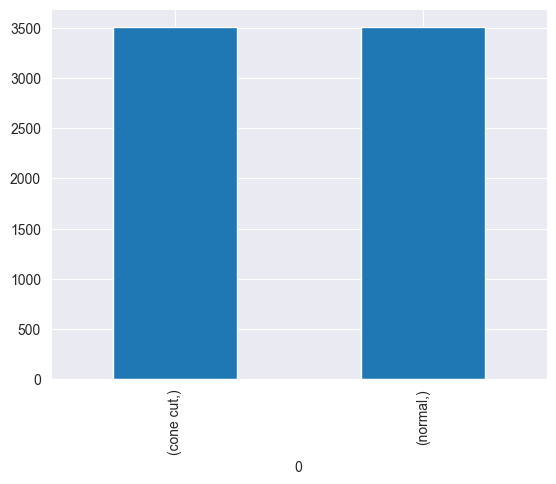

In [397]:
# Displaying the data inside the dataframe in a plot bar

df.value_counts().plot(kind='bar')

Text(0.5, 1.0, 'cone cut')

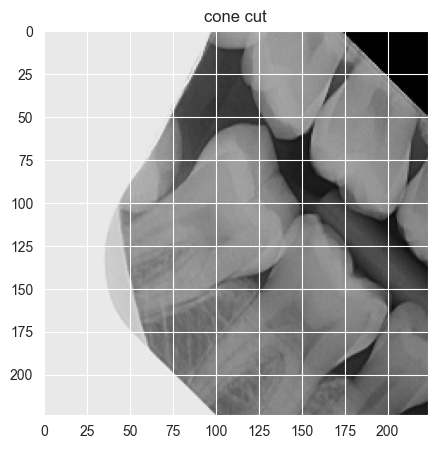

In [398]:
# Visualize a random image from the cone cut classes

plt.figure(figsize = (5,5))
plt.imshow(train[1][0])
plt.title(labels[train[0][1]])

In [399]:
# Label of the above image

labels[train[0][1]]

'cone cut'

In [400]:
train[0][1]

0

Text(0.5, 1.0, 'normal')

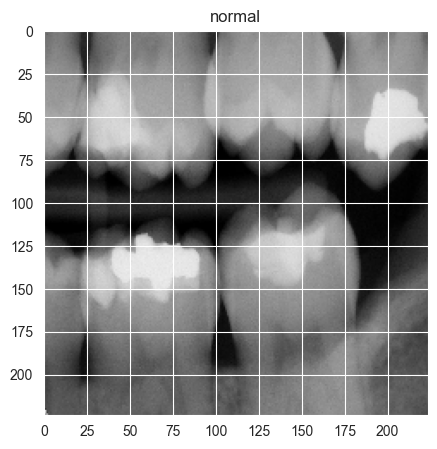

In [401]:
# Visualize a random image from the normal classes

plt.figure(figsize = (5,5))
plt.imshow(train[-1][0])
plt.title(labels[train[-1][1]])

In [402]:
labels[train[-1][1]]

'normal'

In [403]:
train[-1][1]

1

## Data Preprocessing and Data Augmentation

In [404]:
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train: # fetures are the pixel values 
  x_train.append(feature)
  y_train.append(label)

for feature, label in val:
  x_val.append(feature)
  y_val.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

In [405]:
# Data augmentation on the train data

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

## Define the Model

In [65]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(224,224,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(2, activation="softmax"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 32)      9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 56, 56, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 28, 28, 64)      

In [66]:
# Using Adam as our optimizer and SparseCategoricalCrossentropy as the loss function

opt = Adam(lr=0.000001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [67]:
# Training our model for 100 epochs 

history = model.fit(x_train,y_train,epochs = 100 , validation_data = (x_val, y_val))

Epoch 1/100


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


74/74 [==============================] - 106s 1s/step - loss: 0.5921 - accuracy: 0.7908 - val_loss: 0.4508 - val_accuracy: 0.9162
Epoch 2/100
74/74 [==============================] - 127s 2s/step - loss: 0.4307 - accuracy: 0.8863 - val_loss: 0.3462 - val_accuracy: 0.9162
Epoch 3/100
74/74 [==============================] - 108s 1s/step - loss: 0.3807 - accuracy: 0.8863 - val_loss: 0.3187 - val_accuracy: 0.9162
Epoch 4/100
74/74 [==============================] - 83s 1s/step - loss: 0.3720 - accuracy: 0.8863 - val_loss: 0.3100 - val_accuracy: 0.9162
Epoch 5/100
74/74 [==============================] - 81s 1s/step - loss: 0.3686 - accuracy: 0.8863 - val_loss: 0.3071 - val_accuracy: 0.9162
Epoch 6/100
74/74 [==============================] - 79s 1s/step - loss: 0.3676 - accuracy: 0.8863 - val_loss: 0.3058 - val_accuracy: 0.9162
Epoch 7/100
74/74 [==============================] - 75s 1s/step - loss: 0.3663 - accuracy: 0.8863 - val_loss: 0.3049 - val_accuracy: 0.9162
Epoch 8/100
74/74 [===

## Evaluating the result

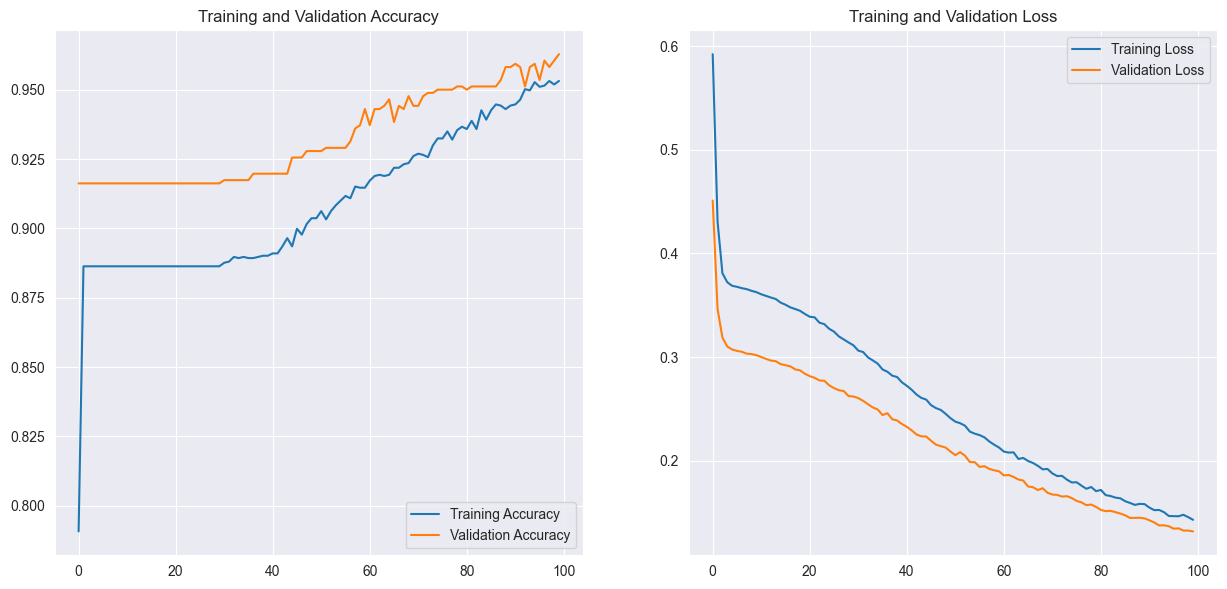

In [68]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(100)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [69]:
# print out the classification report to see the precision and accuracy.

predictions = model.predict(x_val)
# predictions = predictions.reshape(1,-1)[0]
print(classification_report(y_val, predictions, target_names = ['cone cut (Class 0)','normal (Class 1)']))

27/27 [==============================] - 8s 262ms/step


ValueError: Found input variables with inconsistent numbers of samples: [859, 1718]

# Transfer Learning

## Import the model

In [ ]:
# Specifying the include_top=False argument, you load a network that doesn’t include the classification layers at the top
base_model = tf.keras.applications.MobileNetV2(input_shape = (224, 224, 3), include_top = False, weights = "imagenet")

In [ ]:
# Freezing will prevent the weights in our base model from being updated during training
base_model.trainable = False

In [ ]:
# define our model using our base_model
model = tf.keras.Sequential([base_model,
                                 tf.keras.layers.GlobalAveragePooling2D(), # GlobalAveragePooling function to convert the features into a single vector per image
                                 tf.keras.layers.Dropout(0.2), # add a dropout of 0.2 
                                 tf.keras.layers.Dense(2, activation="softmax") # final dense layer with 2 neurons and softmax activation                                    
                                ])

In [ ]:
# compile the model and start training it
base_learning_rate = 0.00001
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train,y_train,epochs = 500 , validation_data = (x_val, y_val))

## Evaluating the result

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(500)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# Print the classification report to get more detailed results
predictions = model.predict_classes(x_val)
predictions = predictions.reshape(1,-1)[0]

print(classification_report(y_val, predictions, target_names = ['Rugby (Class 0)','Soccer (Class 1)']))

https://medium.com/nerd-for-tech/easily-split-your-directory-into-train-validation-and-testing-format-f1359f34dd93\
https://www.youtube.com/watch?v=4HU5DiGD4lY\
https://www.analyticsvidhya.com/blog/2020/10/create-image-classification-model-python-keras/